In [1]:
# Import dependencies
%matplotlib inline
import numpy as np
np.random.seed(42) # fixing the seed
import matplotlib
import matplotlib.pyplot as plt
import rampy as rp
import scipy
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
from scipy.signal import find_peaks, peak_widths
import pathlib
import seaborn as sns
import math

# Snivy color scheme
snivy = ['#F4D638', '#5AB355', '#1F766D', '#F1F0B8', '#9C413E']
venusaur = ['#3F9490', '#7BB7B7', '#E86E7F', '#EAC787', '#5F9569']
# Colors
ptcolors = ['#ed1c24', '#015798']

In [2]:
# LOD threshold
LODt = 1.5


def processTrace(filename, frameRate=1): 
    df = pd.read_csv(filename)
    df['Time'] = df['[sec]']/frameRate
    df['Index'] = np.asfarray(range(0, len(df)))
    
    # Normalize to initial fluorescence
    df['F0'] = df['Mean']/df['Mean'][0]
    df['F0'] = np.subtract(df['F0'], df['F0'][0])
    df['F0'] = np.subtract(df['F0'], min(df['F0']))
    return df

def processTrace2(filename, frameRate=0.94): 
    df = pd.read_csv(filename)
    df['Time'] = df['Slice']/frameRate
    
    # Normalize to initial fluorescence
    df['F0'] = df['Mean']/df['Mean'][0]
    df['F0'] = np.subtract(df['F0'], df['F0'][0])
    df['F0'] = np.subtract(df['F0'], min(df['F0']))
    return df

def stimAdj(x_array, offset=1, stimTime=9.5): 
    x = np.asfarray([])
    for i in range(0, len(x_array)):
        if x_array[i] > stimTime: 
            x = np.append(x, x_array[i]+offset)
        else: 
            x = np.append(x, x_array[i])
    return x

In [3]:
# Snatch all text files in current directory
import os             
all_files = os.listdir()   # imagine you're one directory above test dir
# print(all_files)  # won't necessarily be sorted
import glob
filenames = glob.glob("./*.csv")
print(filenames)

['./trace9.csv', './trace11.csv', './trace10.csv', './trace8.csv', './trace12.csv', './trace13.csv', './trace17.csv', './trace16.csv', './trace14.csv', './trace15.csv', './trace0.csv', './trace18.csv', './trace19.csv', './trace1.csv', './trace3.csv', './trace2.csv', './trace6.csv', './trace22.csv', './trace23.csv', './trace7.csv', './trace5.csv', './trace21.csv', './trace20.csv', './trace4.csv']


140


ValueError: x and y must have same first dimension, but have shapes (70,) and (140,)

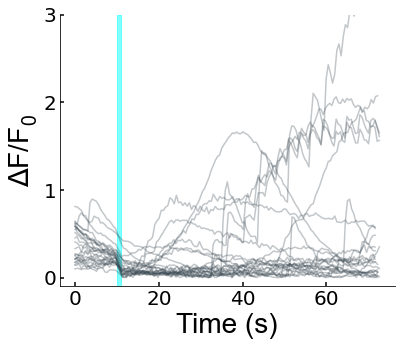

In [6]:
fig, ax1 = plt.subplots(figsize=(6,5))
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='20')
# Turn off spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xticks([0, 20, 40, 60])

# Highlight Stim"
ax1.axvspan(10, 11, alpha=0.5, color='cyan')
ax1.set_ylim(-0.1, 3)
ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="28")
ax1.set_ylabel('$\mathregular{\Delta}$F/F$\mathregular{_{0}}$', fontname="Arial", fontsize="28")

big_y = np.asfarray([])
for i in range(0, len(filenames)):
    try: 
        df = processTrace(filenames[i])
        if len(big_y) == 0:
            if len(df['F0']) == 140:
                big_y = np.append(big_y, df['F0'])
            else: 
                y = np.asfarray(df['F0'])
                y = y[range(0, len(y), 2)]
                big_y = np.append(big_y, y)
        elif len(big_y) != 0:
            if len(df['F0']) == 140:
                big_y = np.vstack((big_y, df['F0']))
            else: 
                y = np.asfarray(df['F0'])
                y = y[range(0, len(y), 2)]
                big_y = np.vstack((big_y, y))
        x = stimAdj(df['Time'], stimTime=9.8)
        plt.plot(x, df['F0'], color='#36454f', alpha=0.3)
    except: 
        pass

df = processTrace(filenames[0])
x = np.asfarray(df['Time'])
x = x[range(0, len(x), 2)]
x = stimAdj(x, stimTime=9.8)
y = np.mean(big_y, axis=0)
print(len(y))
plt.plot(x, y, color='black', linewidth=3)


    
# Save
plt.tight_layout()
plt.savefig('HydraTraces.pdf', format = 'pdf')
plt.show()

140


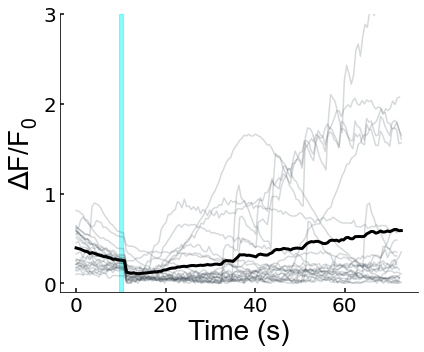

In [5]:
# If the previous didn't work, this should
fig, ax1 = plt.subplots(figsize=(6,5))
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='20')
# Turn off spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim(-.2, 8)

# Highlight Stim
ax1.axvspan(9.5, 10.5, alpha=0.5, color='cyan')
ax1.set_ylim(-0.1, 3)
ax1.set_xlabel('Time (s)', fontname="Arial", fontsize="28")
ax1.set_ylabel('$\mathregular{\Delta}$F/F$\mathregular{_{0}}$', fontname="Arial", fontsize="28")

big_y = np.asfarray([])
for i in range(0, len(filenames)):
    try: 
        df = processTrace(filenames[i])
        if len(big_y) == 0:
            if len(df['F0']) == 140:
                big_y = np.append(big_y, df['F0'])
            else: 
                y = np.asfarray(df['F0'])
                y = y[range(0, len(y), 2)]
                big_y = np.append(big_y, y)
        elif len(big_y) != 0:
            if len(df['F0']) == 140:
                big_y = np.vstack((big_y, df['F0']))
            else: 
                y = np.asfarray(df['F0'])
                y = y[range(0, len(y), 2)]
                big_y = np.vstack((big_y, y))
        x = stimAdj(df['Time'])
        plt.plot(x, df['F0'], color='#36454f', alpha=0.2)
    except: 
        pass

df = processTrace(filenames[0])
x = np.asfarray(df['Time'])
# x = x[range(0, len(x), 2)]
y = np.mean(big_y, axis=0)
print(len(y))
x = stimAdj(x)
plt.plot(x, y, color='black', linewidth=3)
    
# Save
plt.tight_layout()
plt.savefig('HydraTraces.pdf', format = 'pdf')
plt.show()